In [ ]:
import pandas as pd
import numpy as np

#load dataset
df= pd.read_csv("/content/used_cars_UK.csv")

print(df.info())
print(df.head())

#kolom yang relevan
df = df[['Price', 'Mileage(miles)', 'Previous Owners', 'Fuel type', 'Gearbox']]

#cek missing value
print(df.isnull().sum())
#hapus missing valuw
df = df.dropna().reset_index(drop=True)

#normalisasi kategori Fuel type
df['Fuel type'] = df['Fuel type'].replace({
    'Petrol Plug-in Hybrid': 'Other',
    'Hybrid': 'Other',
    'Electric': 'Other'
})

#ambil hanya Petrol dan Diesel
df = df[df['Fuel type'].isin(['Petrol', 'Diesel'])]

# =Petrol= 0,Diesel = 1
df['Fuel type'] = df['Fuel type'].map({'Petrol': 0, 'Diesel': 1})

#Manual = 0, Automatic = 1
df['Gearbox'] = df['Gearbox'].map({'Manual': 0, 'Automatic': 1})

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB
None
   Unnamed: 0           title  Price  Mileage(miles)  Re

Hasil evaluasi regresi:
MSE: 10879782.06
RMSE: 3298.45
R^2: 0.4366


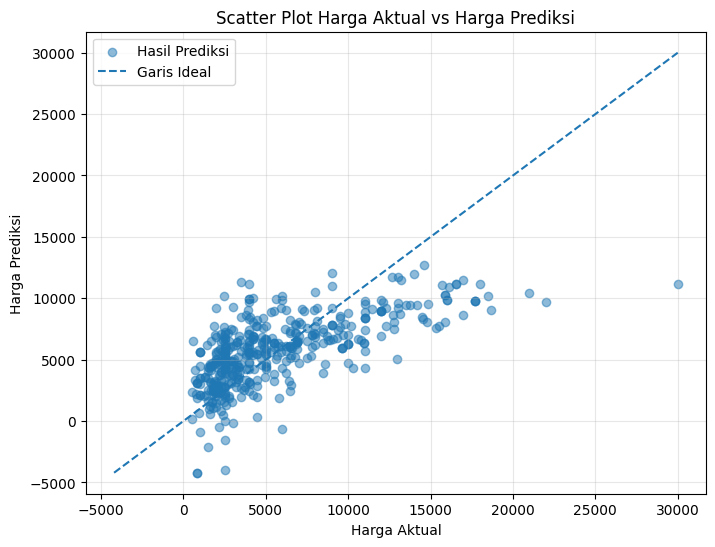


Perbandingan nilai asli dan prediksi
   Harga Asli  Prediksi Model
0        1695     4506.947403
1        4250     2132.937617
2        4000     9953.361234
3        2490     4903.792329
4       13495     9486.980677


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pisahkan fitur dan target
X = df[['Mileage(miles)', 'Previous Owners', 'Fuel type', 'Gearbox']]
y = df['Price']

#splti data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

#model regresi linier
model = LinearRegression()

#training model
model.fit(X_train, y_train)

#prediksi
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Hasil evaluasi regresi:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.4f}")

#scatter
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Hasil Prediksi')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', label='Garis Ideal')

plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Scatter Plot Harga Aktual vs Harga Prediksi')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nPerbandingan nilai asli dan prediksi")
perbandingan = pd.DataFrame({
    'Harga Asli': y_test.values.flatten(),
    'Prediksi Model': y_pred.flatten()
})
print(perbandingan.head())